# MNIST digits classification using CNN

In [122]:
#Import neccessary libraries

import torch

import torchvision

from torchvision import transforms, utils,datasets
from torch.autograd import Variable
import torch.utils.data as data_utils
import numpy as np
import matplotlib.pyplot as graph

import torch.nn.functional as F

In [123]:
#Download data and apply transform

mean_gray=0.1307
stddev=0.3081

transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((mean_gray,),(stddev,))])

mnist_train=datasets.MNIST('./data',train=True,download=True,transform=transform)
mnist_test=datasets.MNIST('./data',train=False,download=True,transform=transform)


tensor(3)


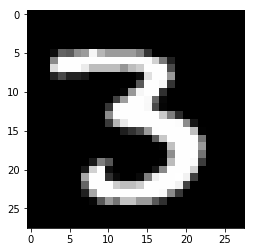

In [125]:
#look at a dataset sample

img=mnist_train[12][0].numpy()*stddev + mean_gray

graph.imshow(img.reshape(28,28),cmap='gray')

label=mnist_train[12][1]
print(label.data)

In [126]:
#Using the downloaded data ,create a DataLoader for training

batch_size=2048
mnist_train_loader=torch.utils.data.DataLoader(dataset=mnist_train,batch_size=batch_size,shuffle=True)
mnist_test_loader=torch.utils.data.DataLoader(dataset=mnist_test,batch_size=batch_size,shuffle=True)

In [127]:
#Model definition

class MNISTnet(torch.nn.Module):
    
    def __init__(self):
        
        super().__init__()
        
        #1st CNN Layer
        
        self.convolution1=torch.nn.Conv2d(1,20,kernel_size=5)
        self.relu1=torch.nn.ReLU()
        
        
        #2nd CNN layer
        
        
        self.convolution2=torch.nn.Conv2d(20,30,kernel_size=5)
        self.convolution2_drop=torch.nn.Dropout2d(p=0.5)
        self.maxpool2=torch.nn.MaxPool2d(2)
        self.relu2=torch.nn.ReLU()
        
        #Fully connected layer
        
        self.fully_connected_1=torch.nn.Linear(3000,500)
        self.fully_connected_2=torch.nn.Linear(500,10)
        
    
    def forward(self,input_var):
        
        #Passing through first Convolution layer
        x=self.convolution1(input_var)
        x=self.relu1(x)
        
        #Passing through second Convolution layer
        x=self.convolution2(x)
        x=self.convolution2_drop(x)
        x=self.maxpool2(x)
        x=self.relu2(x)
        
        #Reshaping 2d to 1d
        x=x.view(-1,3000)
        
        #Passing through the fully connected layer
        x=self.fully_connected_1(x)
        x=F.relu(x)
        x=F.dropout(x,p=0.5,training=True)
        x=self.fully_connected_2(x)
        
        return x
        
        

In [128]:
#Creating an instance of 
net = MNISTnet()

#Define a loss function
criterion=torch.nn.CrossEntropyLoss()

#Specifying the value of learning rate
learning_rate=0.001

#Specifying the type of optimizer
optimizer = torch.optim.SGD(net.parameters(),lr=learning_rate,momentum=0.9)



In [142]:
#Declare list for storing performace parameter values

train_loss=[]
train_accuracy=[]
epoch_list=[]


In [143]:
#Train the network

no_of_epoch=5

for epoch in range(no_of_epoch):
    
    #All the below declared variable are for a single epoch
    loss_per_epoch=0
    no_of_sample_trained=0
    sample_correctly_trained=0
    
    for i,(train_features,train_labels) in enumerate(mnist_train_loader):
        
        train_features=Variable(train_features)
        train_labels=Variable(train_labels)
        
        net.train()
        
        optimizer.zero_grad()
        
        output=net(train_features)
        
        loss=criterion(output,train_labels)
        
        loss_per_epoch += loss.data
        
        loss.backward()
        
        optimizer.step()
        
        no_of_sample_trained += train_labels.size(0)
        
        _ , predicted_labels = torch.max(output.data,1)
        
        sample_correctly_trained += (train_labels.data==predicted_labels).sum()
        
        
    
    train_loss.append(loss_per_epoch.item())
    epoch_list.append(epoch)
    train_accuracy.append(sample_correctly_trained.item()/no_of_sample_trained)
        
    
    print(epoch,loss_per_epoch.item(),no_of_sample_trained,sample_correctly_trained.item())

0 7.720526218414307 60000 55558
1 7.491251468658447 60000 55616
2 7.433417320251465 60000 55756
3 7.151498317718506 60000 55871
4 7.121023178100586 60000 55956


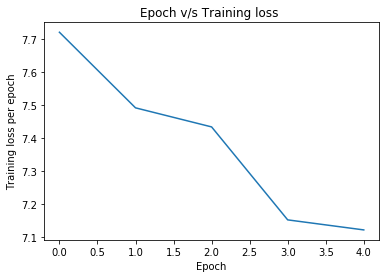

In [144]:
#Graph of performance parameter: Training_loss

graph.plot(epoch_list,train_loss)
graph.xlabel('Epoch')
graph.ylabel('Training loss per epoch')
graph.title('Epoch v/s Training loss ')
graph.show()

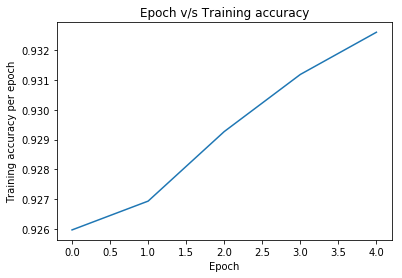

In [145]:
#Graph of performance parameter: Training Accuracy

graph.plot(epoch_list,train_accuracy)
graph.xlabel('Epoch')
graph.ylabel('Training accuracy per epoch')
graph.title('Epoch v/s Training accuracy')
graph.show()


